___
# APS QUIZ 1

## 2023 - 1o. semestre 

___


## NOME: Raphael Cavalcanti Banov

In [1]:
# %matplotlib inline
import math
from math import sqrt

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from IPython.display import display  # Para ter melhor print.

# Pode trazer mais bibliotecas, caso julgue interessante!!

<div id="indice"></div>

## Índice

1. [Pergunta 1](#p1)

1. [Pergunta 2](#p2)

1. [Pergunta 3](#p3)

1. [Pergunta 4](#p4)

1. [Pergunta 5](#p5)

1. [Pergunta 6](#p5)

<div id="abrindo-arquivo"></div>

___

**Abrindo um arquivo de dados e visualizando seu conteúdo:**


In [2]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\rapha\OneDrive - Insper - Institudo de Ensino e Pesquisa\Área de Trabalho\Faculdade\3 semestre\cdados_dp\cdados_2023_1\quizzes



In [3]:
filename = 'df_quiz1.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}. Lembre-se que precisa estar na mesma pasta do arquivo notebook')

Parece que o arquivo df_quiz1.xlsx está na mesma pasta do notebook, yay!


Abrindo a base de dados:

In [4]:
df = pd.read_excel(filename)

Avaliando as 3 primeiras linhas da base de dados:

In [5]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441


Avaliando o tipo de cada variável disponível no *dataframe* `df`:

[Voltar ao Índice](#indice)

___
<div id="p1"></div>

## PERGUNTA 1: 
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [11]:
freq_abs = df.value_counts(df['job_title']).to_frame()
freq_abs.head(3)

,0
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97


[Voltar ao Índice](#indice)

In [14]:
freq_rel = df.value_counts(df['job_title'], True).to_frame()
freq_rel.head(3).round(4)

,0
job_title,
Data Scientist,0.2356
Data Engineer,0.2175
Data Analyst,0.1598


___
<div id="p2"></div>

## PERGUNTA 2:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [33]:
df2 = df.loc[(df.work_year == 2020), :].loc[(df.employment_type == 'FT'), :]
lista_paises=list(df2.value_counts(df2.company_location).head().to_frame().index)


['US', 'DE', 'FR', 'GB', 'IN']

In [40]:
df2_III = df.loc[(df.employment_type == 'FT'), :]
df2_IV = df2_III.loc[(df2_III.company_location.isin(lista_paises)), :]
df2_IV

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1182
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,1473
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S,1573
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,1223
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,1201
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,1121
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,1310


In [47]:
sal_usd = df2_IV.salary_in_usd
sal_usd.describe().to_frame().round(4)
sal_usd.median()


117789.0

[Voltar ao Índice](#indice)

___
<div id="p3"></div>

## PERGUNTA 3:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [50]:
pd.crosstab(df.company_size, df.remote_ratio, normalize=True).round(4)

remote_ratio,0,50,100
company_size,,,
L,0.0527,0.0988,0.1746
M,0.1301,0.0346,0.3723
S,0.0264,0.0297,0.0807


[Voltar ao Índice](#indice)

<div id="p4"></div>

## PERGUNTA 4:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [56]:
df4 = df.loc[(df.employee_residence == 'BR'), :]
f'correlação linear: {df4.monthly_expensies.corr(df.salary_in_usd):.4f}'

'correlação linear: -0.6980'

[Voltar ao Índice](#indice)

<div id="p5"></div>

## PERGUNTA 5:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [63]:
df5 = df.loc[(df.company_location != 'US'), :]
df5['salary_in_10kusd'] = df5.salary_in_usd/10000
df5.head()


C:\Users\rapha\AppData\Local\Temp\ipykernel_5596\2683121196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['salary_in_10kusd'] = df5.salary_in_usd/10000


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies,salary_in_10kusd
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382,7.9833
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405,26.0000
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441,10.9024
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,987,2.0000
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,1498,3.5735


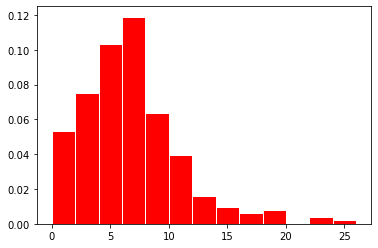

In [70]:
faixas = np.arange(0,26+1,2)
plt.hist(df5.salary_in_10kusd, bins=faixas, color='r', edgecolor='white', density=True)
plt.show()


[Voltar ao Índice](#indice)

<div id="p6"></div>

## PERGUNTA 6:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [74]:
df6 = df.loc[(df.work_year == 2022), :]
bp1 = df6.loc[(df6.remote_ratio == 0), 'salary']
bp2 = df6.loc[(df6.remote_ratio == 50), 'salary']
bp3 = df6.loc[(df6.remote_ratio == 100), 'salary']



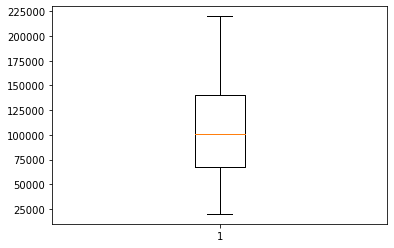

In [79]:
plt.boxplot(bp1)
plt.show()

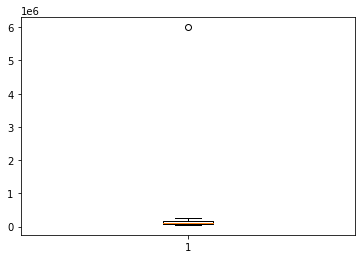

In [80]:
plt.boxplot(bp2)
plt.show()

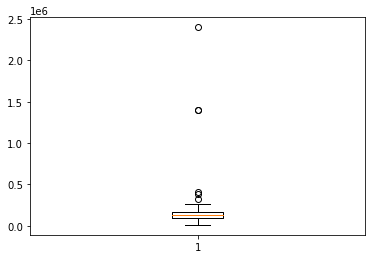

In [81]:
plt.boxplot(bp3)
plt.show()

[Voltar ao Índice](#indice)